# **6장. RTF 차질과 계획대로 실행**

주차별 RTF 차질 분석을 위한 테이블 B를 만든다.
테이블 A: 주차별 모델별 과다출하, 출하차질, RTF 불일치율
테이블 B: 주차별 과다출하, 출하차질, RTF 불일치율
파이썬 코드의 필드와 테이블 A, B의 필드는 영문명을 사용한다.
한글명과 영문명은 매핑은 아래와같다.
주차 Week, 모델 MODEL, 과다출하 P, 출하차질 M, RTF 불일치율 R
주차별 모델별 과다출하(P), 출하차질(M), RTF 불일치율을 먼저 계산하고(테이블 A), 이후에
주차별 평균값인 주차별 과다출하, 출하차질, RTF 불일치율을 계산한다(테이블 B).
RTF _DATA.xlsx에 주차별(Week) 모델별(MODEL) RTF(RTF)와 실적(ACTUAL)이 있다.
주차별 모델별 과다출하는 MAX(실적-RTF, 0) 이다.
주차별 모델별 출하차질은 MAX(RTF - 실적, 0) 이다.
주차별 모델별 RTF 불일치율은 (1 - 실적/RTF)의 절대값이다(단위는 %가 아니고 비율이다).
주차(Week)는 02, 03, 04…와 같이 문자형으로 저장하다.
data = pd.read_excel(file_path)를 사용한다.
데이터를 읽을 때, 한글명을 영문명으로 변경한다.
한글로 작성한다.

# 도표 6-7. 주차별 모델별 RTF와 실적

In [ ]:
import pandas as pd

file_path = '/content/sample_data/RTF_DATA.xlsx'
data = pd.read_excel(file_path)

data.head()

,주차,MODEL,RTF,실적
0,2,모델03,8626,8626
1,2,모델04,23587,26956
2,2,모델07,23088,23088
3,2,모델08,9850,0
4,2,모델09,76149,76149


In [ ]:
# 한글 필드명을 영문명으로 변경
# '주차', '모델', 'RTF', '실적' 등의 한글 필드명을 각각 'Week', 'MODEL', 'RTF', 'ACTUAL'로 변경합니다.
data.columns = ['Week', 'MODEL', 'RTF', 'ACTUAL']

# 테이블 A 생성: 주차별 모델별 과다출하, 출하차질, RTF 불일치율 계산
# 과다출하(P)는 '실적'이 'RTF'보다 클 경우 그 차이를 계산합니다. 그 외의 경우는 0으로 처리합니다.
# clip(lower=0) 함수는 음수 값이 나오지 않도록 0 이하의 값은 0으로 설정합니다.
data['P'] = (data['ACTUAL'] - data['RTF']).clip(lower=0)

# 출하차질(M)은 'RTF'가 '실적'보다 클 경우 그 차이를 계산합니다. 그 외의 경우는 0으로 처리합니다.
# 출하차질은 실제 출하가 예상 출하보다 적을 때 발생합니다.
data['M'] = (data['RTF'] - data['ACTUAL']).clip(lower=0)

# RTF 불일치율(R)은 '실적'과 'RTF'의 차이의 절대 비율을 나타냅니다.
# 계산식은 절대값(|1 - 실적/RTF|)을 사용하여, 비율이 양수로만 나타나게 합니다.
data['R'] = abs(1 - data['ACTUAL'] / data['RTF'])

data.head()

,Week,MODEL,RTF,ACTUAL,P,M,R
0,2,모델03,8626,8626,0,0,0.000000
1,2,모델04,23587,26956,3369,0,0.142833
2,2,모델07,23088,23088,0,0,0.000000
3,2,모델08,9850,0,0,9850,1.000000
4,2,모델09,76149,76149,0,0,0.000000


# 도표 6-10. ChatGPT의 주차별 집계 오류 파이썬 코드

In [ ]:
# 테이블 B 생성: 주차별 평균 과다출하, 출하차질, RTF 불일치율 계산
table_b = data.groupby('Week')['P', 'M', 'R'].mean().reset_index()

table_b.head()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

# 도표 6-11. ChatGPT의 주차별 집계 오류를 수정한 파이썬 코드

In [ ]:
# 올바른 문법으로 수정하여 테이블 B 생성
# data.groupby('Week')를 통해 데이터를 'Week' 필드 기준으로 그룹화합니다. 이는 같은 주차끼리 데이터를 모으는 작업입니다.
# [['P', 'M', 'R']]로 필요한 열만 선택하여 그룹별 평균을 계산합니다.
# 이는 각 주차별로 'P', 'M', 'R' 값의 평균을 구하는 것입니다.
# mean() 함수는 선택된 각 그룹(주차별)의 평균을 계산합니다.
# reset_index() 함수를 사용하여 그룹화된 데이터의 인덱스를 초기화합니다.
# 이는 데이터프레임이 그룹화에 의해 변경된 인덱스 구조를 일반적인 인덱스 구조로 되돌립니다.
table_b_corrected = data.groupby('Week')[['P', 'M', 'R']].mean().reset_index()

# 수정된 결과 확인: 이를 통해 생성된 테이블 B의 첫 5주차 데이터를 빠르게 확인할 수 있습니다.
table_b_corrected.head()

,Week,P,M,R
0,2,13027.105263,34540.596491,0.408870
1,3,21024.909091,41872.054545,0.281535
2,4,16071.631579,48657.859649,0.376064
3,5,30753.134615,43136.673077,0.495096
4,6,7567.678571,35892.946429,0.257563


# 도표 6-12. ChatGPT에게 RTF차질 분석 혼합형 차트 요청

주차별 과다출하, 출하차질, RTF 불일치율에 대한 혼합형 차트를 만든다.
X축은 주차이고 Y축의 왼쪽은 과다출하의 단위이고 오른쪽은 RTF 불일치율의 단위이다.
Y축은 천 단위마다 콤마를 표시하고. Y축 오른쪽은 0부터 0.6까지 표시한다.
Y축 설명은 생략한다.
RTF 불일치율(R)은 표식이 있는 파란색 꺽은 선형이다.
과다출하(P)는 짙은 분홍색이 있는 노란색이고 출하차질(R)은 짙은 초록색이며, 윤곽선은 검은색인 누적 세로 막대형이다.
제목은 "RTF 차질 분석" 이다.

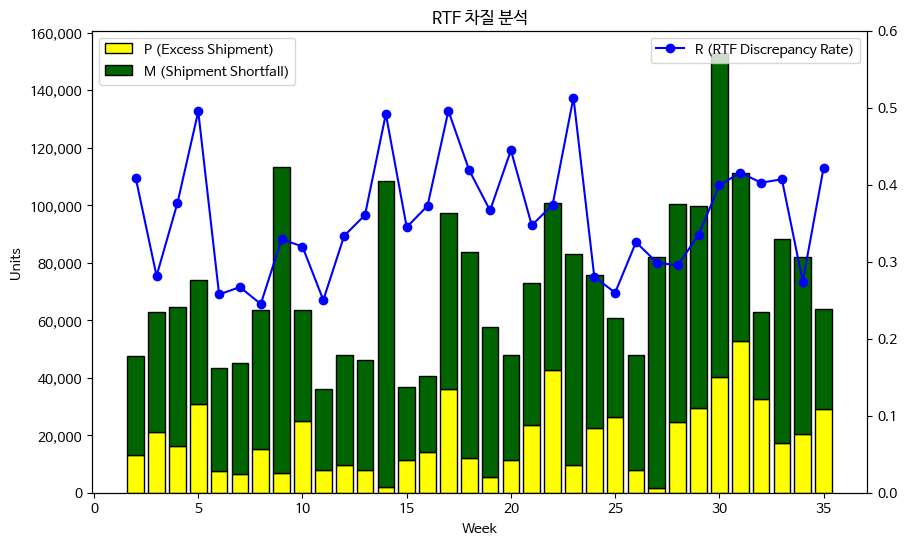

In [ ]:
# matplotlib.pyplot을 plt로 축약하여 가져옵니다. 이 라이브러리는 데이터를 그래픽으로 표현하는 데 사용됩니다.
import matplotlib.pyplot as plt
# matplotlib의 ticker 모듈을 불러옵니다. 이 모듈은 축의 틱 포매팅에 사용됩니다.
import matplotlib.ticker as ticker

# 데이터를 주차별 오름차순으로 정렬합니다.
table_b_corrected = table_b_corrected.sort_values(by='Week')

# 차트를 생성합니다. figsize로 그래프의 크기를 설정합니다.
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 Y축 설정 (왼쪽 - 막대 그래프)
# 과다출하에 대한 막대 그래프를 그립니다. 색상은 노란색, 윤곽선은 검은색입니다.
ax1.bar(table_b_corrected['Week'], table_b_corrected['P'],
        color='yellow', edgecolor='black', label='P (Excess Shipment)')
# 출하차질에 대한 막대 그래프를 과다출하 위에 누적하여 그립니다. 색상은 짙은 초록색, 윤곽선은 검은색입니다.
ax1.bar(table_b_corrected['Week'], table_b_corrected['M'], bottom=table_b_corrected['P'],
        color='darkgreen', edgecolor='black', label='M (Shipment Shortfall)')
# X축 라벨을 'Week'로 설정합니다.
ax1.set_xlabel('Week')
# 왼쪽 Y축 라벨을 'Units'로 설정합니다.
ax1.set_ylabel('Units')
# Y축의 값에 천 단위 콤마를 적용합니다.
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 두 번째 Y축 설정 (오른쪽 - 선 그래프)
# RTF 불일치율에 대한 선 그래프를 그립니다. 표식이 있는 파란색 선으로 표현합니다.
ax2 = ax1.twinx()
ax2.plot(table_b_corrected['Week'], table_b_corrected['R'], 'b-o', label='R (RTF Discrepancy Rate)')
# 오른쪽 Y축의 범위를 0에서 0.6까지 설정합니다.
ax2.set_ylim(0, 0.6)

# 그래프의 제목을 설정합니다.
plt.title('RTF 차질 분석')
# 범례를 표시합니다. 첫 번째 Y축의 범례는 왼쪽 상단, 두 번째 Y축의 범례는 오른쪽 상단에 위치합니다.
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 최종적으로 그래프를 화면에 표시합니다.
plt.show()



# 도표 6-13. 한글 폰트 설치

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 도표 6-14. 한글 폰트 재 설치 및 확인하기

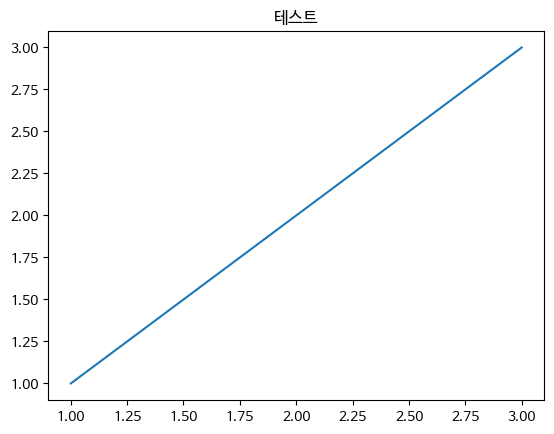

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 예시 경로

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

# Matplotlib의 rcParams에 폰트 지정
plt.rcParams['font.family'] = font_name

# 그래프 그리기 예시
plt.figure()
plt.plot([1, 2, 3], [1, 2, 3])
plt.title('테스트')
plt.show()


# 도표 6-15. ChatGPT의 RTF차질 분석 혼합형 차트 파이썬 코드

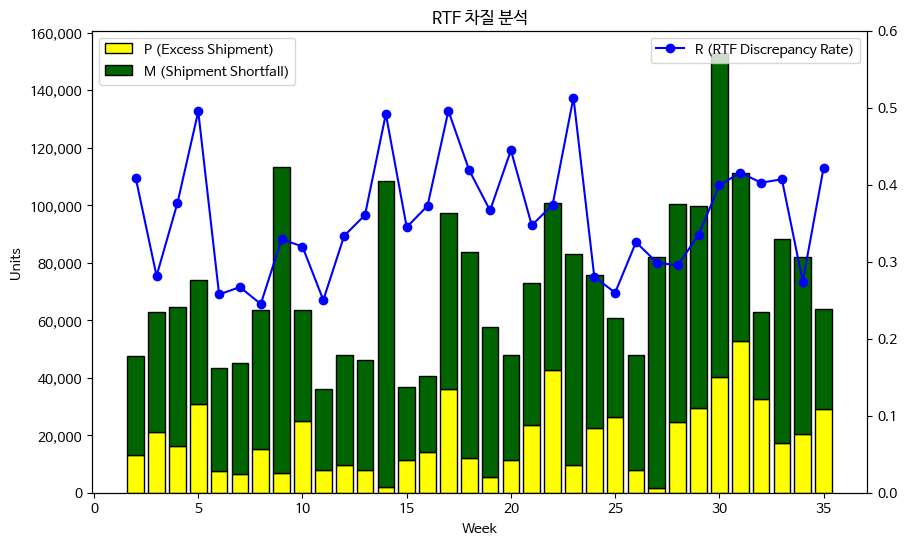

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 데이터 정렬 (주차별 오름차순)
table_b_corrected = table_b_corrected.sort_values(by='Week')

# 차트 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 Y축 (왼쪽 - 막대 그래프)
ax1.bar(table_b_corrected['Week'], table_b_corrected['P'], color='yellow', edgecolor='black', label='P (Excess Shipment)')
ax1.bar(table_b_corrected['Week'], table_b_corrected['M'], bottom=table_b_corrected['P'], color='darkgreen', edgecolor='black', label='M (Shipment Shortfall)')
ax1.set_xlabel('Week')
ax1.set_ylabel('Units')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))  # 천 단위 콤마

# 두 번째 Y축 (오른쪽 - 선 그래프)
ax2 = ax1.twinx()
ax2.plot(table_b_corrected['Week'], table_b_corrected['R'], 'b-o', label='R (RTF Discrepancy Rate)')
ax2.set_ylim(0, 0.6)

# 타이틀 및 레전드 설정
plt.title('RTF 차질 분석')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()